In [1]:
import pandas as pd
!pip install deep-translator

In [2]:
df = pd.read_csv("BD.REST.csv")

In [3]:
df.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
5,10457,08-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris
6,10459,08-11-2022,Sides & Other,4.99,200.40,In-store,Credit Card,Walter Muller,Berlin
7,10460,09-11-2022,Burgers,12.99,554.27,In-store,Credit Card,Remy Monet,Paris
8,10461,09-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Remy Monet,Paris
9,10462,09-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [5]:
df.describe()

,Order ID,Price,Quantity
count,254.000000,254.000000,254.000000
mean,10584.133858,7.102323,460.611457
std,75.889181,4.341855,214.888699
min,10452.000000,2.950000,200.400000
25%,10520.250000,3.490000,201.010000
50%,10583.500000,4.990000,538.880000
75%,10649.750000,9.950000,677.440000
max,10713.000000,29.050000,754.430000


In [6]:
df.shape

(254, 9)

In [7]:
df.columns

Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City'],
      dtype='object')

In [8]:
novos_nomes = {
    'Order ID': 'ID do Pedido',
    'Date': 'Data',
    'Product': 'Produto',
    'Price': 'Preço',
    'Quantity': 'Quantidade',
    'Purchase Type': 'Tipo de Compra',
    'Payment Method': 'Método de Pagamento',
    'Manager': 'Gerente',
    'City': 'Cidade'
}

# Renomear as colunas
df.rename(columns=novos_nomes, inplace=True)

# Conferir
df.head()

,ID do Pedido,Data,Produto,Preço,Quantidade,Tipo de Compra,Método de Pagamento,Gerente,Cidade
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [9]:
df["Produto"].value_counts()

Produto
Chicken Sandwiches    52
Burgers               52
Fries                 51
Beverages             50
Sides & Other         49
Name: count, dtype: int64

In [11]:
df["Tipo de Compra"].value_counts()

Tipo de Compra
Online         107
In-store        86
Drive-thru      61
Name: count, dtype: int64

In [12]:
df["Método de Pagamento"].value_counts()

Método de Pagamento
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64

In [13]:
df["Cidade"].value_counts()

Cidade
London    75
Lisbon    75
Madrid    46
Berlin    30
Paris     28
Name: count, dtype: int64

In [20]:
# Dicionário de tradução dos produtos
produtos = {
    'Chicken Sandwiches': 'Sanduíches de Frango',
    'Burgers': 'Hambúrgueres',
    'Fries': 'Batatas Fritas',
    'Beverages': 'Bebidas',
    'Sides & Other': 'Acompanhamentos e Outros'
}

# Aplicar a tradução no DataFrame
df['Produto'] = df['Produto'].replace(produtos)

# Verificar a contagem de cada produto
print(df['Produto'].value_counts())

Produto
Sanduíches de Frango        52
Hambúrgueres                52
Batatas Fritas              51
Bebidas                     50
Acompanhamentos e Outros    49
Name: count, dtype: int64


In [23]:
# Garantir que são strings e remover espaços extras
df['Tipo de Compra'] = df['Tipo de Compra'].astype(str).str.strip()
df['Método de Pagamento'] = df['Método de Pagamento'].astype(str).str.strip()

# Dicionários de tradução
tipo_compra = {
    'Online': 'Online',
    'In-store': 'Loja Física',
    'Drive-thru': 'Drive-thru'
}

metodo_pagamento = {
    'Credit Card': 'Cartão de Crédito',
    'Cash': 'Dinheiro',
    'Gift Card': 'Vale Presente'
}

# Aplicar as traduções
df['Tipo de Compra'] = df['Tipo de Compra'].replace(tipo_compra)
df['Método de Pagamento'] = df['Método de Pagamento'].replace(metodo_pagamento)

# Conferir contagens
print(df['Tipo de Compra'].value_counts())
print(df['Método de Pagamento'].value_counts())

Tipo de Compra
Online         107
Loja Física     86
Drive-thru      61
Name: count, dtype: int64
Método de Pagamento
Cartão de Crédito    120
Dinheiro              76
Vale Presente         58
Name: count, dtype: int64


In [24]:
# Padronizar a coluna para evitar problemas com espaços
df['Cidade'] = df['Cidade'].astype(str).str.strip()

# Dicionário de tradução da coluna 'Cidade'
cidades = {
    'London': 'Londres',
    'Lisbon': 'Lisboa',
    'Madrid': 'Madri',
    'Berlin': 'Berlim',
    'Paris': 'Paris'
}

# Aplicar a tradução
df['Cidade'] = df['Cidade'].replace(cidades)

# Conferir contagem
print(df['Cidade'].value_counts())

Cidade
Londres    75
Lisboa     75
Madri      46
Berlim     30
Paris      28
Name: count, dtype: int64


In [29]:
print(df['Data'].value_counts())

Data
09-11-2022    5
11-11-2022    5
14-11-2022    5
13-11-2022    5
12-11-2022    5
21-11-2022    5
22-11-2022    5
23-11-2022    5
15-11-2022    5
16-11-2022    5
17-11-2022    5
18-11-2022    5
19-11-2022    5
26-11-2022    5
25-11-2022    5
27-11-2022    5
24-11-2022    5
01-12-2022    5
30-11-2022    5
29-11-2022    5
28-11-2022    5
22-12-2022    5
15-12-2022    5
16-12-2022    5
17-12-2022    5
02-12-2022    5
03-12-2022    5
05-12-2022    5
06-12-2022    5
10-12-2022    5
07-12-2022    5
08-12-2022    5
09-12-2022    5
12-12-2022    5
11-12-2022    5
13-12-2022    5
14-12-2022    5
26-12-2022    5
23-12-2022    5
24-12-2022    5
25-12-2022    5
18-12-2022    5
19-12-2022    5
20-12-2022    5
21-12-2022    5
28-12-2022    5
27-12-2022    5
10-11-2022    4
08-11-2022    4
29-12-2022    4
07-11-2022    3
20-11-2022    2
04-12-2022    2
Name: count, dtype: int64


In [25]:
df.head()

,ID do Pedido,Data,Produto,Preço,Quantidade,Tipo de Compra,Método de Pagamento,Gerente,Cidade
0,10452,07-11-2022,Batatas Fritas,3.49,573.07,Online,Vale Presente,Tom Jackson,Londres
1,10453,07-11-2022,Bebidas,2.95,745.76,Online,Vale Presente,Pablo Perez,Madri
2,10454,07-11-2022,Acompanhamentos e Outros,4.99,200.40,Loja Física,Vale Presente,Joao Silva,Lisboa
3,10455,08-11-2022,Hambúrgueres,12.99,569.67,Loja Física,Cartão de Crédito,Walter Muller,Berlim
4,10456,08-11-2022,Sanduíches de Frango,9.95,201.01,Loja Física,Cartão de Crédito,Walter Muller,Berlim


In [26]:
df.describe(include = 'object')

,Data,Produto,Tipo de Compra,Método de Pagamento,Gerente,Cidade
count,254,254,254,254,254,254
unique,53,5,3,3,14,5
top,09-11-2022,Sanduíches de Frango,Online,Cartão de Crédito,Tom Jackson,Londres
freq,5,52,107,120,74,75


In [27]:
df.isnull()

,ID do Pedido,Data,Produto,Preço,Quantidade,Tipo de Compra,Método de Pagamento,Gerente,Cidade
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
249,False,False,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False


In [28]:
#Contar os valores nulos
df.isnull().sum()

ID do Pedido           0
Data                   0
Produto                0
Preço                  0
Quantidade             0
Tipo de Compra         0
Método de Pagamento    0
Gerente                0
Cidade                 0
dtype: int64

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<Axes: xlabel='Produto', ylabel='Quantidade'>

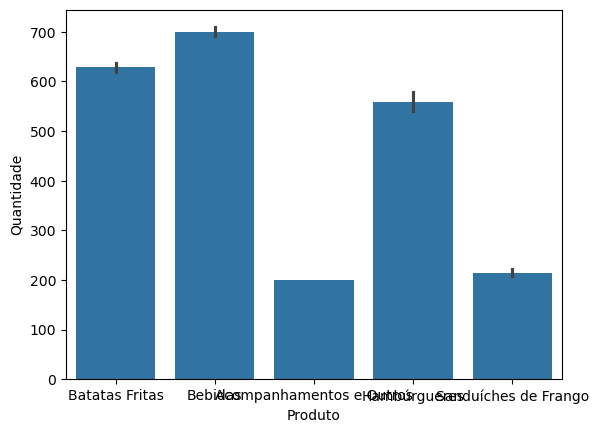

In [33]:
sns.barplot(data=df, x = 'Produto', y = 'Quantidade')

<function matplotlib.pyplot.show(close=None, block=None)>

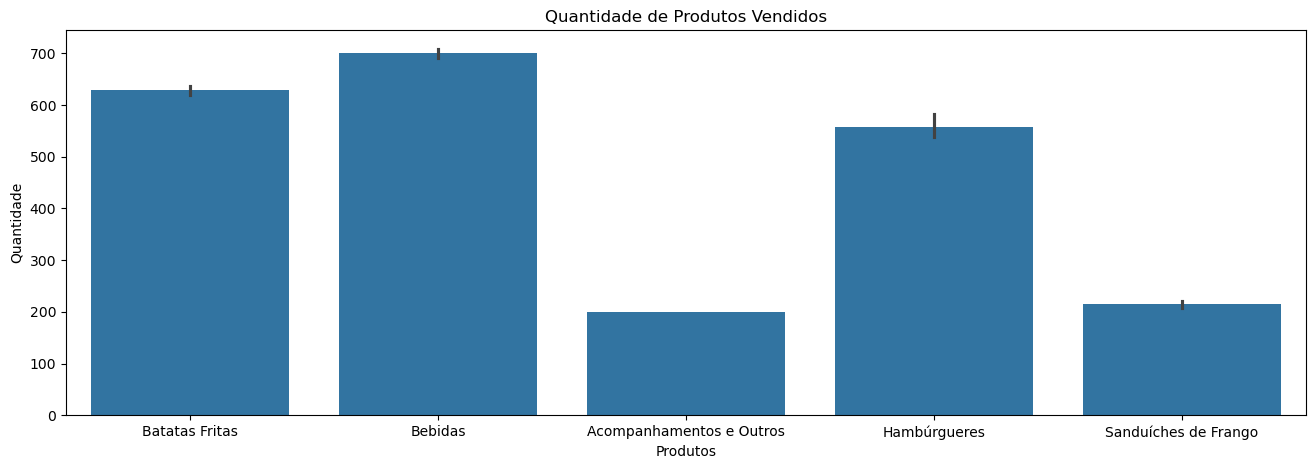

In [37]:
plt.figure(figsize=(16,5))
sns.barplot(data=df, x = 'Produto', y = 'Quantidade')
plt.title('Quantidade de Produtos Vendidos')
plt.xlabel('Produtos')
plt.ylabel('Quantidade')
plt.show

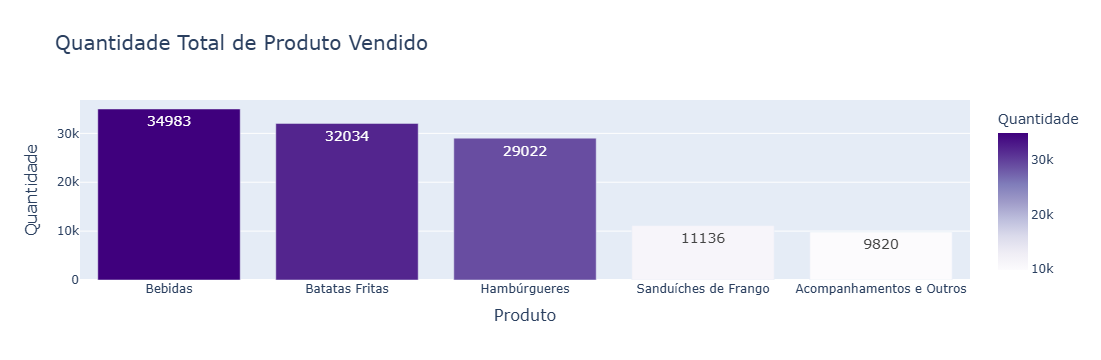

In [56]:
# Calcular a quantidade total por produto
quantidade_por_produto = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).reset_index()

# Criar gráfico de barras com gradiente rosa/roxo
fig = px.bar(
    quantidade_por_produto,
    x='Produto',
    y='Quantidade',
    title='Quantidade Total de Produto Vendido',
    labels={'Produto': 'Produto', 'Quantidade': 'Quantidade'},
    text=quantidade_por_produto['Quantidade'].apply(lambda x: f"{x:.0f}"),  # valor no topo sem casas decimais
    color='Quantidade',
    color_continuous_scale='Purples'
)

# Aumentar tamanho dos labels e título
fig.update_layout(
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    title_font=dict(size=20)
)

# Aumentar o texto no topo das barras
fig.update_traces(textfont_size=14)

fig.show()

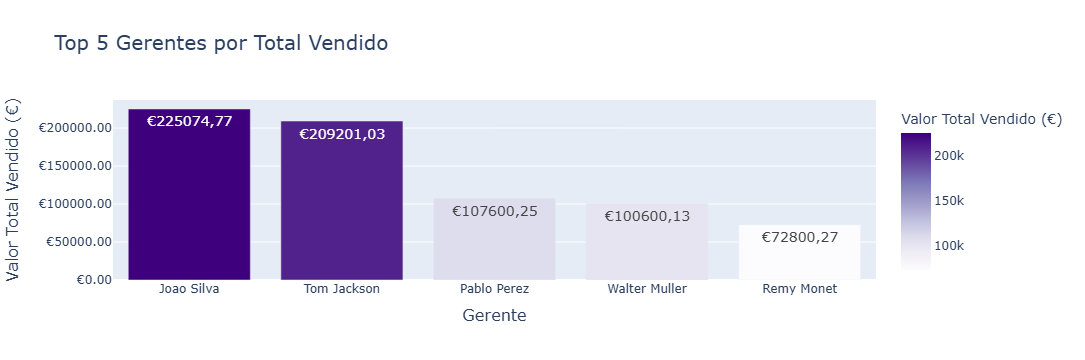

In [55]:
# Criar coluna de valor total por venda
df['Total Venda'] = df['Preço'] * df['Quantidade']

# Calcular o total vendido por gerente e pegar top 5
vendas_por_gerente = df.groupby('Gerente')['Total Venda'].sum().sort_values(ascending=False).reset_index()
vendas_top5 = vendas_por_gerente.head(5)

# Criar gráfico de barras com gradiente rosa/roxo
fig = px.bar(
    vendas_top5,
    x='Gerente',
    y='Total Venda',
    title='Top 5 Gerentes por Total Vendido',
    labels={'Gerente': 'Gerente', 'Total Venda': 'Valor Total Vendido (€)'},
    text=vendas_top5['Total Venda'].apply(lambda x: f"€{x:.2f}".replace('.', ',')),  # vírgula decimal
    color='Total Venda',
    color_continuous_scale='Purples'  # gradiente roxo
)

# Formatar eixo Y apenas com vírgula decimal
fig.update_yaxes(tickprefix="€", separatethousands=False, tickformat=".2f")

# Aumentar tamanho dos labels e título
fig.update_layout(
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    title_font=dict(size=20)
)

# Aumentar o texto no topo das barras
fig.update_traces(textfont_size=14)

fig.show()


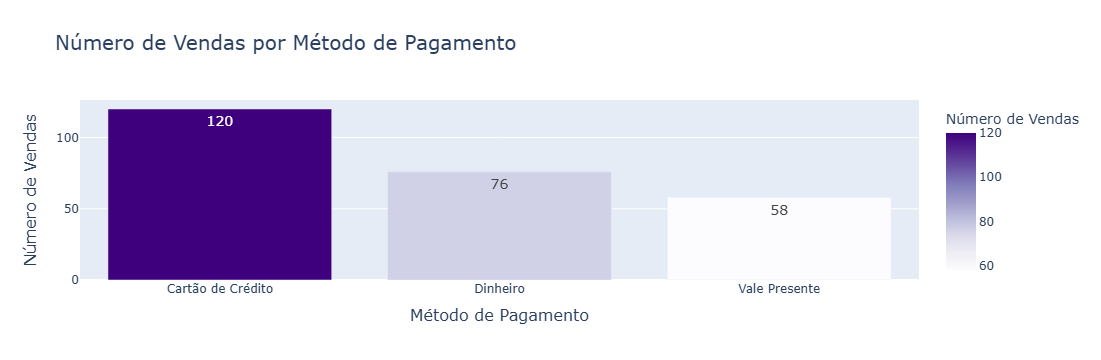

In [58]:
# Contar número de vendas por método de pagamento
vendas_por_pagamento = df['Método de Pagamento'].value_counts().reset_index()
vendas_por_pagamento.columns = ['Método de Pagamento', 'Número de Vendas']

# Criar gráfico de barras com gradiente rosa/roxo
fig = px.bar(
    vendas_por_pagamento,
    x='Método de Pagamento',
    y='Número de Vendas',
    title='Número de Vendas por Método de Pagamento',
    labels={'Método de Pagamento': 'Método de Pagamento', 'Número de Vendas': 'Número de Vendas'},
    text=vendas_por_pagamento['Número de Vendas'].apply(lambda x: f"{x}"),  # valor no topo
    color='Número de Vendas',
    color_continuous_scale='Purples'
)

# Aumentar tamanho dos labels e título
fig.update_layout(
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    title_font=dict(size=20)
)

# Aumentar o texto no topo das barras
fig.update_traces(textfont_size=14)

fig.show()

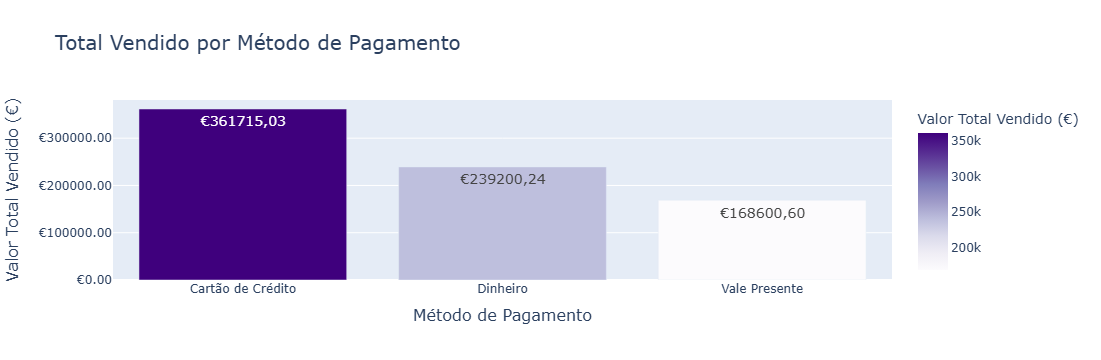

In [60]:

# Calcular o total vendido por método de pagamento
vendas_valor_por_pagamento = df.groupby('Método de Pagamento')['Total Venda'].sum().sort_values(ascending=False).reset_index()

# Criar gráfico de barras com gradiente rosa/roxo
fig = px.bar(
    vendas_valor_por_pagamento,
    x='Método de Pagamento',
    y='Total Venda',
    title='Total Vendido por Método de Pagamento',
    labels={'Método de Pagamento': 'Método de Pagamento', 'Total Venda': 'Valor Total Vendido (€)'},
    text=vendas_valor_por_pagamento['Total Venda'].apply(lambda x: f"€{x:.2f}".replace('.', ',')),  # só vírgula decimal
    color='Total Venda',
    color_continuous_scale='Purples'
)

# Formatar eixo Y apenas com vírgula decimal
fig.update_yaxes(tickprefix="€", separatethousands=False, tickformat=".2f")

# Aumentar tamanho dos labels e título
fig.update_layout(
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    title_font=dict(size=20)
)

# Aumentar o texto no topo das barras
fig.update_traces(textfont_size=14)

fig.show()